In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Read Point Cloud Data

x: 8.650390625            # Point x coordinates in m (front from antenna)

y: 6.92578125             # Point y coordinates in m (left/right from antenna, right positive)

z: 0.0                    # Point z coordinates in m (up/down from antenna, up positive)

In [19]:
# file_name = "/Users/xin/Desktop/millimeter wave/code_exp/cloud_point/stationary_2_items_facing_up_1m.txt"
file_name = "/Users/xin/Desktop/millimeter wave/code_exp/cloud_point/stationary_2_items_facing_up_1m.txt"

In [20]:
with open(file_name, "r") as f:
    dataRaw = f.read()
    f.close()

In [21]:
point_data = {"pointID":[], "x":[], "y":[], "z":[]}

for data in dataRaw.split("---\n")[:-1]:
    line = data.split("\n")
    if np.float(line[7].split(": ")[1]) < 3:
        point_data["pointID"].append(np.float(line[6].split(": ")[1]) )
        point_data["x"].append(np.float(line[7].split(": ")[1]) )
        point_data["y"].append(np.float(line[8].split(": ")[1]) )
        point_data["z"].append(np.float(line[9].split(": ")[1]) )

for key in point_data.keys():
    print(key, len(point_data[key]))


pointID 1831
x 1831
y 1831
z 1831


### Sample by frames and Visualize

In [22]:
frame_size = 60

In [23]:
data_frames = []
for f_num in np.arange(0, len(point_data["x"])//frame_size):
    s = f_num*frame_size
    e = (f_num+1)*frame_size
    frame = [point_data["x"][s:e], point_data["y"][s:e], point_data["z"][s:e]]
    data_frames.append(frame)

data_frames = np.array(data_frames)
print("data_frames shape:", np.shape(data_frames))

data_frames shape: (30, 3, 60)


frame_id: 29


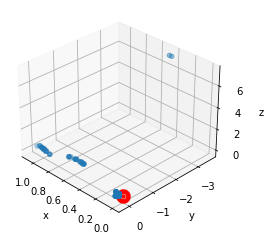

In [24]:
frame_id = np.random.randint(0, np.shape(data_frames)[0])
print("frame_id:", frame_id)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data_frames[frame_id][0], data_frames[frame_id][1], data_frames[frame_id][2], cmap='Greens')
ax.scatter3D([0], [0], [0], linewidths = 10, c = "r")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(elev=30, azim=135)

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
def get_label_analysis(lables):
    num = np.max(lables) + 1
    print("noises: ",  len(np.argwhere(lables == -1)), len(np.argwhere(lables == -1))/len(lables))

    for i in range(num):
        print(i, len(np.argwhere(lables == i)), len(np.argwhere(lables == i))/len(lables))

b : blue.
g : green.
r : red.
c : cyan.
m : magenta.
y : yellow.
k : black.
w : white

In [27]:
def label2color(labels):
    color = ["b", "g", "r", "c", "m", "y", "k", "w"]
    out = []
    for i,l in enumerate(labels):
        out.append(color[l])
    return out

Cluster Pred: 
noises:  5 0.08333333333333333
0 17 0.2833333333333333
1 5 0.08333333333333333
2 13 0.21666666666666667
3 20 0.3333333333333333


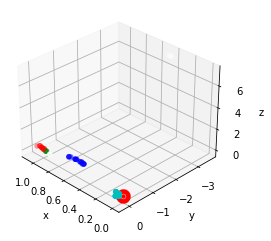

In [28]:
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other. 
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. 
clustering = DBSCAN(eps=0.1, min_samples=5).fit_predict(data_frames[frame_id].T)

colors = label2color(clustering)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data_frames[frame_id][0], data_frames[frame_id][1], data_frames[frame_id][2], c=colors)
ax.scatter3D([0], [0], [0], linewidths = 10, c = "r")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(elev=30, azim=135)
# ax.legend()

print("Cluster Pred: ")
get_label_analysis(clustering)

### Show largest cluster

In [29]:
def get_max_cluster(labels):
    max_id = -1
    num_points = -1
    for i in range(np.max(labels)):
        if len(np.where(labels == i)[0]) > num_points:
            num_points = len(np.where(labels == i)[0])
            max_id = i
    return max_id, np.argwhere(labels == max_id)

max_cluster, cluster_idx = get_max_cluster(clustering)

max_cluster:  0
Num of max_cluster:  17


Text(0, 0.5, 'z')

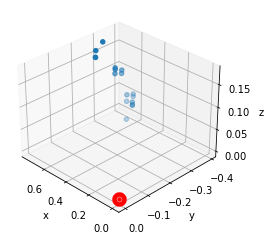

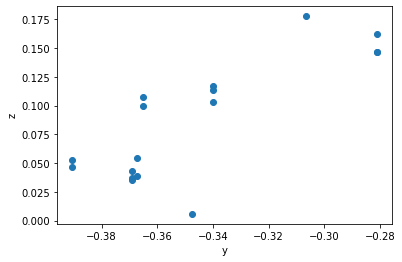

In [30]:
max_cluster, cluster_idx = get_max_cluster(clustering)
print("max_cluster: ", max_cluster)
print("Num of max_cluster: ", len(cluster_idx))


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data_frames[frame_id][0][cluster_idx], data_frames[frame_id][1][cluster_idx], data_frames[frame_id][2][cluster_idx], cmap="Greens")
ax.scatter3D([0], [0], [0], linewidths = 10, c = "r")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(elev=30, azim=135)

fig = plt.figure()
plt.scatter(data_frames[frame_id][1][cluster_idx], data_frames[frame_id][2][cluster_idx])
plt.xlabel("y")
plt.ylabel("z")